In [41]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
# In addition, we’ll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Note
#You can only unzip a zipped tuple once before it is removed from the computer’s memory.
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [8]:
#Note
#The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
weather_api_key

'4f14d4e563335a9624b52bc87be69cca'

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f14d4e563335a9624b52bc87be69cca


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
        # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    # Create endpoint URL with each city.
city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hammerfest
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tecpan
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | eyemouth
Processing Record 7 of Set 1 | satao
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | banff
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | ketchikan
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | devonport
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of 

Processing Record 33 of Set 4 | namibe
Processing Record 34 of Set 4 | hailun
Processing Record 35 of Set 4 | loukhi
Processing Record 36 of Set 4 | hofn
Processing Record 37 of Set 4 | samarai
Processing Record 38 of Set 4 | yokadouma
Processing Record 39 of Set 4 | antalaha
Processing Record 40 of Set 4 | varadero
Processing Record 41 of Set 4 | alfonsine
Processing Record 42 of Set 4 | guarapari
Processing Record 43 of Set 4 | davila
Processing Record 44 of Set 4 | laguna
Processing Record 45 of Set 4 | castelo branco
Processing Record 46 of Set 4 | caluquembe
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | qaqortoq
Processing Record 50 of Set 4 | sibolga
Processing Record 1 of Set 5 | ternova
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | meridian
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | qasigiannguit
Processing Rec

Processing Record 22 of Set 8 | nchelenge
Processing Record 23 of Set 8 | borama
City not found. Skipping...
Processing Record 24 of Set 8 | masterton
Processing Record 25 of Set 8 | muroto
Processing Record 26 of Set 8 | goroka
Processing Record 27 of Set 8 | tiznit
Processing Record 28 of Set 8 | finschhafen
Processing Record 29 of Set 8 | grand gaube
Processing Record 30 of Set 8 | montepuez
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | meyungs
City not found. Skipping...
Processing Record 33 of Set 8 | dolgorukovo
Processing Record 34 of Set 8 | telchac
Processing Record 35 of Set 8 | tatarskaya pishlya
Processing Record 36 of Set 8 | tubuala
Processing Record 37 of Set 8 | itapirapua
Processing Record 38 of Set 8 | ribeira grande
Processing Record 39 of Set 8 | qujing
Processing Record 40 of Set 8 | esperance
Processing Record 41 of Set 8 | vieques
Processing Record 42 of Set 8 | luanda
Processing Record 43 of Set 8 | gangapur
Processing Record 44 of Set 8 |

Processing Record 9 of Set 12 | lanzhou
Processing Record 10 of Set 12 | igarka
Processing Record 11 of Set 12 | naples
Processing Record 12 of Set 12 | marsa matruh
Processing Record 13 of Set 12 | qinhuangdao
Processing Record 14 of Set 12 | tocopilla
Processing Record 15 of Set 12 | matara
Processing Record 16 of Set 12 | kodinsk
Processing Record 17 of Set 12 | carmen
Processing Record 18 of Set 12 | odoyev
Processing Record 19 of Set 12 | standerton
Processing Record 20 of Set 12 | sovetskiy
Processing Record 21 of Set 12 | florence
Processing Record 22 of Set 12 | vila velha
Processing Record 23 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 24 of Set 12 | harboore
Processing Record 25 of Set 12 | nhulunbuy
Processing Record 26 of Set 12 | muros
Processing Record 27 of Set 12 | chokurdakh
Processing Record 28 of Set 12 | boksitogorsk
Processing Record 29 of Set 12 | asau
Processing Record 30 of Set 12 | klyuchi
Processing Record 31 of Set 12 | grez-doiceau

In [13]:
len(city_data)

568

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hammerfest,70.66,23.68,24.80,85,90,23.04,NO,2020-04-04 22:22:28
1,Rikitea,-23.12,-134.97,76.37,79,91,14.74,PF,2020-04-04 22:22:28
2,Tecpan,14.76,-90.99,71.60,78,75,9.17,GT,2020-04-04 22:22:28
3,Bredasdorp,-34.53,20.04,63.00,87,16,4.70,ZA,2020-04-04 22:22:28
4,Eyemouth,55.87,-2.09,50.00,87,100,10.29,GB,2020-04-04 22:22:28
5,Satao,40.74,-7.73,63.00,59,98,8.01,PT,2020-04-04 22:22:28
6,Tuktoyaktuk,69.45,-133.04,8.60,71,40,9.17,CA,2020-04-04 22:22:28
7,Fortuna,40.60,-124.16,54.00,81,75,6.93,US,2020-04-04 22:22:28
8,Banff,51.18,-115.57,23.00,69,100,8.99,CA,2020-04-04 22:22:29
9,Avarua,-21.21,-159.78,80.60,88,100,7.76,CK,2020-04-04 22:22:29


In [15]:
new_column_order = ['City', 'Country','Date','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hammerfest,NO,2020-04-04 22:22:28,70.66,23.68,24.80,85,90,23.04
1,Rikitea,PF,2020-04-04 22:22:28,-23.12,-134.97,76.37,79,91,14.74
2,Tecpan,GT,2020-04-04 22:22:28,14.76,-90.99,71.60,78,75,9.17
3,Bredasdorp,ZA,2020-04-04 22:22:28,-34.53,20.04,63.00,87,16,4.70
4,Eyemouth,GB,2020-04-04 22:22:28,55.87,-2.09,50.00,87,100,10.29
...,...,...,...,...,...,...,...,...,...
563,Kipushi,CD,2020-04-04 22:23:20,-11.77,27.23,59.50,60,12,2.42
564,College,US,2020-04-04 22:23:20,64.86,-147.80,35.60,86,90,3.74
565,Kungurtug,RU,2020-04-04 22:23:20,50.60,97.52,30.33,53,100,3.40
566,Mount Gambier,AU,2020-04-04 22:20:52,-37.83,140.77,57.20,93,90,23.04


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1586039001.195007

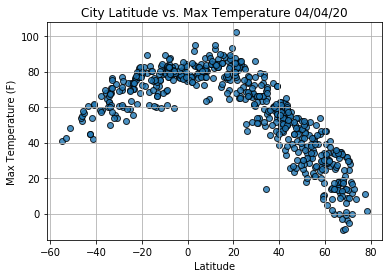

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

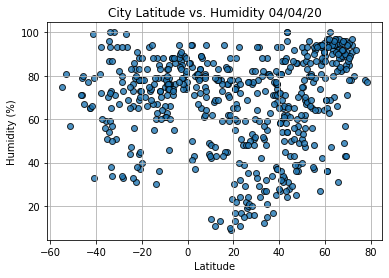

In [21]:
# Build the scatter plots for latitude vs. humidity.             --------------------6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

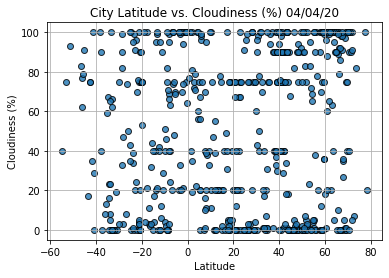

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

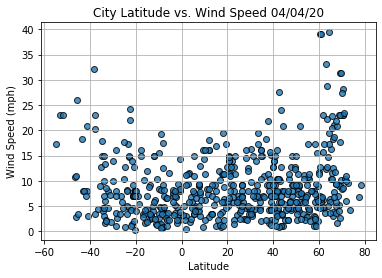

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Create a function to create perform linear regression on the weather data                -------------6.4.2
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City               Saint-Philippe
Country                        RE
Date          2020-04-04 22:22:29
Lat                        -21.36
Lng                         55.77
Max Temp                       77
Humidity                       78
Cloudiness                      4
Wind Speed                   6.93
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
563    False
564     True
565     True
566    False
567    False
Name: Lat, Length: 568, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hammerfest,NO,2020-04-04 22:22:28,70.66,23.68,24.8,85,90,23.04
2,Tecpan,GT,2020-04-04 22:22:28,14.76,-90.99,71.6,78,75,9.17
4,Eyemouth,GB,2020-04-04 22:22:28,55.87,-2.09,50.0,87,100,10.29
5,Satao,PT,2020-04-04 22:22:28,40.74,-7.73,63.0,59,98,8.01
6,Tuktoyaktuk,CA,2020-04-04 22:22:28,69.45,-133.04,8.6,71,40,9.17


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
#plot_linear_regression(x_values, y_values,'title', 'Max Temp',(10,40))

In [35]:
y_values

0      24.80
2      71.60
4      50.00
5      63.00
6       8.60
       ...  
558    72.00
561    48.20
562    17.47
564    35.60
565    30.33
Name: Max Temp, Length: 397, dtype: float64

In [36]:
x_values

0      70.66
2      14.76
4      55.87
5      40.74
6      69.45
       ...  
558    39.08
561    42.35
562    67.68
564    64.86
565    50.60
Name: Lat, Length: 397, dtype: float64

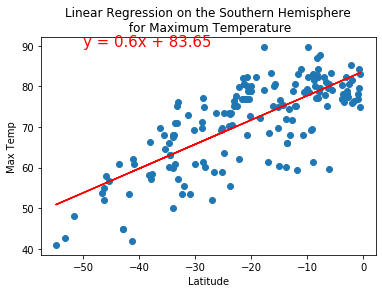

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

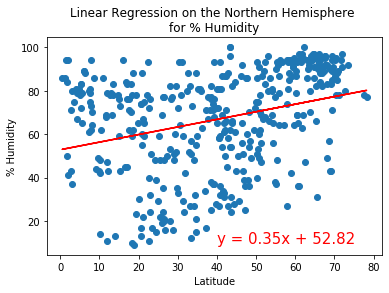

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

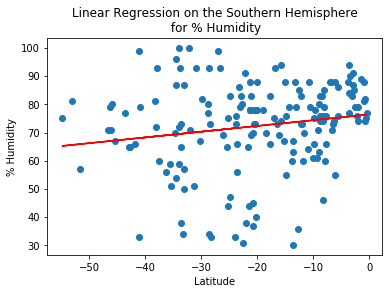

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

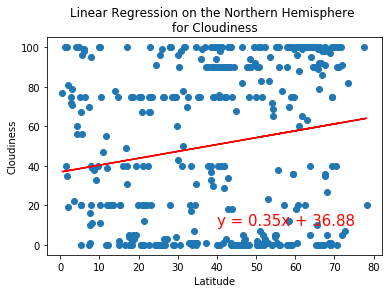

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 'Cloudiness',(40,10))

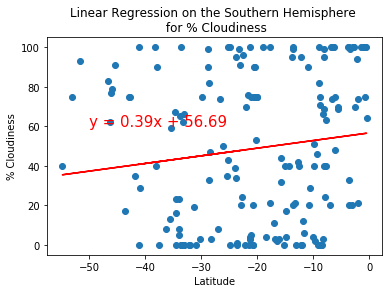

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

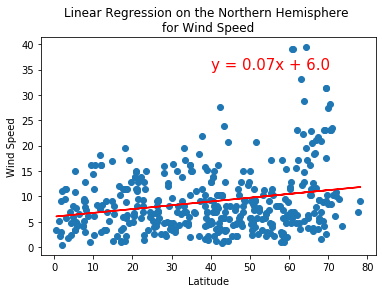

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

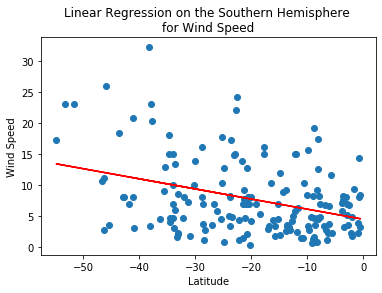

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))